In [ ]:
#importing all libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


In [ ]:
#reading dataset

In [3]:
df=pd.read_csv("cyberbully.csv.zip.csv")
df

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
...,...,...,...,...
8794,8794,0,20120612003508Z,"""Never really gave it much thought. I just fig..."
8795,8795,0,20120619210456Z,"""Nadie se salva de la regla 34 xd"""
8796,8796,0,20120528234613Z,"""Question: Are you a boy or a girl?"""
8797,8797,1,20120619153537Z,"""Leave your email or phone number and maybe yo..."


In [4]:
#head
df.head()

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [5]:
#tail
df.tail()

,index,oh_label,Date,Text
8794,8794,0,20120612003508Z,"""Never really gave it much thought. I just fig..."
8795,8795,0,20120619210456Z,"""Nadie se salva de la regla 34 xd"""
8796,8796,0,20120528234613Z,"""Question: Are you a boy or a girl?"""
8797,8797,1,20120619153537Z,"""Leave your email or phone number and maybe yo..."
8798,8798,0,20120620000237Z,"""From the scenarios you present, I see you bel..."


In [6]:
#number of rows
len(df)

8799

In [7]:
#shape
df.shape

(8799, 4)

In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     8799 non-null   int64 
 1   oh_label  8799 non-null   int64 
 2   Date      7557 non-null   object
 3   Text      8799 non-null   object
dtypes: int64(2), object(2)
memory usage: 275.1+ KB


In [9]:
#describe
df.describe()

,index,oh_label
count,8799.000000,8799.000000
mean,4399.000000,0.318900
std,2540.196843,0.466077
min,0.000000,0.000000
25%,2199.500000,0.000000
50%,4399.000000,0.000000
75%,6598.500000,1.000000
max,8798.000000,1.000000


In [10]:
#size
df.size

35196

In [11]:
df.columns

Index(['index', 'oh_label', 'Date', 'Text'], dtype='object')

In [12]:
#finding missing values
df.isnull().sum()

,0
index,0
oh_label,0
Date,1242
Text,0


In [13]:
#finding missing values percentage
df.isnull().sum()/df.shape[0]*100

,0
index,0.00000
oh_label,0.00000
Date,14.11524
Text,0.00000


In [14]:
#finding duplicates
df.duplicated().sum()

0

In [16]:
#identifiying garbage values
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())

Date
20120529160237Z    3
20120529020515Z    3
20120527213606Z    3
20120527195023Z    3
20120529024955Z    3
                  ..
20120618223427Z    1
20120612124018Z    1
20120620043138Z    1
20120529205519Z    1
20120620000237Z    1
Name: count, Length: 7440, dtype: int64
Text
"dan_amd\n\nYou have realy no clue on every single idiotic comment of all your posts.WE ALL DON'T enjoy your stupid PRO AMD B:U:L:L:S:H:I:T ignorance.Please crawl back then in the fat ass of your gay loving buddy charliedemerjian semiinaccurate and try to find the light inside - U stupid FAG!\n\nWE REALY DON'T NEED AND WANT YOUR POST HERE ANYMORE!"                                                                                                                                                                                                                                                                                                                                                                                 

In [17]:
#exploratory data analysis(EDA)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,8799.0,4399.0000,2540.196843,0.0,2199.5,4399.0,6598.5,8798.0
oh_label,8799.0,0.3189,0.466077,0.0,0.0,0.0,1.0,1.0


In [18]:
df.describe(include="object")

,Date,Text
count,7557,8799
unique,7440,8745
top,20120529160237Z,"""dan_amd\n\nYou have realy no clue on every si..."
freq,3,7


In [19]:
df.drop_duplicates(inplace = True)
df

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
...,...,...,...,...
8794,8794,0,20120612003508Z,"""Never really gave it much thought. I just fig..."
8795,8795,0,20120619210456Z,"""Nadie se salva de la regla 34 xd"""
8796,8796,0,20120528234613Z,"""Question: Are you a boy or a girl?"""
8797,8797,1,20120619153537Z,"""Leave your email or phone number and maybe yo..."


In [20]:
df['Text'].value_counts()

,count
Text,
"""dan_amd\n\nYou have realy no clue on every single idiotic comment of all your posts.WE ALL DON'T enjoy your stupid PRO AMD B:U:L:L:S:H:I:T ignorance.Please crawl back then in the fat ass of your gay loving buddy charliedemerjian semiinaccurate and try to find the light inside - U stupid FAG!\n\nWE REALY DON'T NEED AND WANT YOUR POST HERE ANYMORE!""",7
"""Lol.......Ralph you are the guys who are still in Moi era...""",6
"""You are an idiot.""",5
"""dan_amd\n\n\n\n\nYou have realy no clue on every single idiotic comment of all your posts.\nWE ALL DON'T enjoy your stupid PRO AMD B:U:L:L:S:H:I:T ignorance.\nPlease crawl back then in the fat ass of your gay loving buddy charlie\ndemerjian semiinaccurate and try to find the light inside - U stupid FAG!\n\n\n\n\nWE REALY DON'T NEED AND WANT YOUR POST HERE ANYMORE!""",3
"""you're an idiot""",3
...,...
"""Yes. But he had a distinct view on this continent in particular. Something to the effect they had gold and diamonds literally in the dirt beneath their feet, yet, in the thousands of years they walked its surface they never bothered to look down and imagine the possibilities. He elaborates on the subject.""",1
"""Are you guys fucking retarded ? you're trying to take pictures of these girls ?! you guys are worse than the scum of the earth""",1
"""Thank God the western conference playoffs continue today. The East is pure garbage.""",1


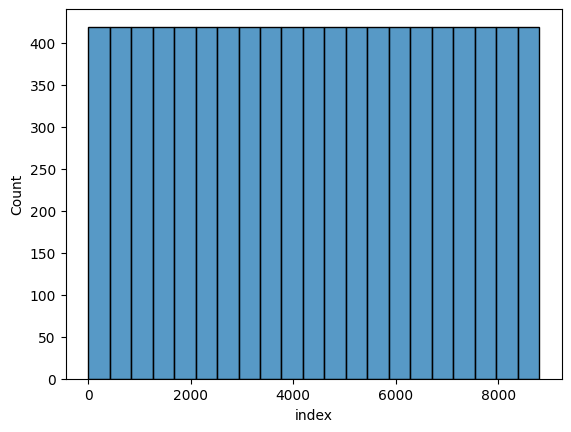

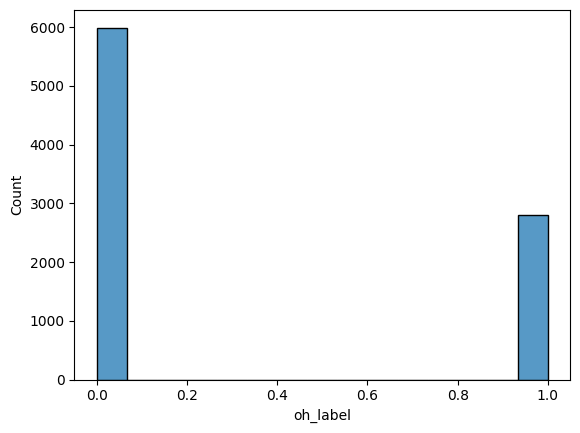

In [21]:

#histogram to understand the distribution
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


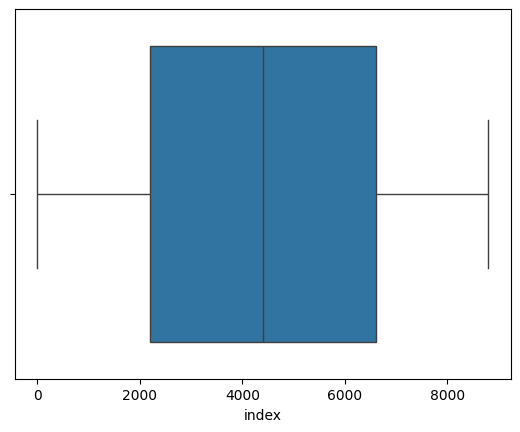

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


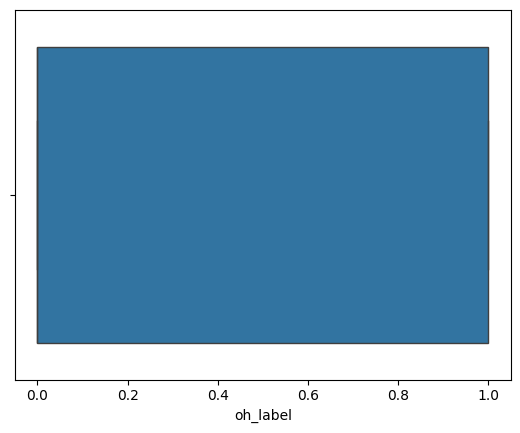

In [22]:
#Boxplot-to-identify Outliers
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [23]:
df.select_dtypes(include="object").columns

Index(['Date', 'Text'], dtype='object')

In [24]:
df.isnull().sum()

,0
index,0
oh_label,0
Date,1242
Text,0


In [25]:
oh_label = 1
if(oh_label==1):
  print("cyberbullying")
else:
  print("not cyberbullying")

cyberbullying


In [26]:
df['oh_label'].replace(['cyberbullying'],
                        [1], inplace=True)
df['oh_label'].replace(['not cyberbullying'],
                        [0], inplace=True)
df

<ipython-input-26-8484a443fb5d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oh_label'].replace(['cyberbullying'],
<ipython-input-26-8484a443fb5d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
...,...,...,...,...
8794,8794,0,20120612003508Z,"""Never really gave it much thought. I just fig..."
8795,8795,0,20120619210456Z,"""Nadie se salva de la regla 34 xd"""
8796,8796,0,20120528234613Z,"""Question: Are you a boy or a girl?"""
8797,8797,1,20120619153537Z,"""Leave your email or phone number and maybe yo..."


In [28]:
class_counts=df['oh_label'].value_counts()
print("Non Cyberbullying (0) : ", df.oh_label.value_counts()[0]/len(df.oh_label)*100,"%")
print("Cyberbullying (1) : ", df.oh_label.value_counts()[1]/len(df.oh_label)*100,"%")


Non Cyberbullying (0) :  68.11001250142061 %
Cyberbullying (1) :  31.889987498579387 %


In [29]:

### Handling duplicate values
df.nunique()

,0
index,8799
oh_label,2
Date,7440
Text,8745


In [30]:
df.drop_duplicates(inplace = True)

In [31]:
df

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
...,...,...,...,...
8794,8794,0,20120612003508Z,"""Never really gave it much thought. I just fig..."
8795,8795,0,20120619210456Z,"""Nadie se salva de la regla 34 xd"""
8796,8796,0,20120528234613Z,"""Question: Are you a boy or a girl?"""
8797,8797,1,20120619153537Z,"""Leave your email or phone number and maybe yo..."


In [32]:
df['oh_label'].value_counts()

,count
oh_label,
0,5993
1,2806


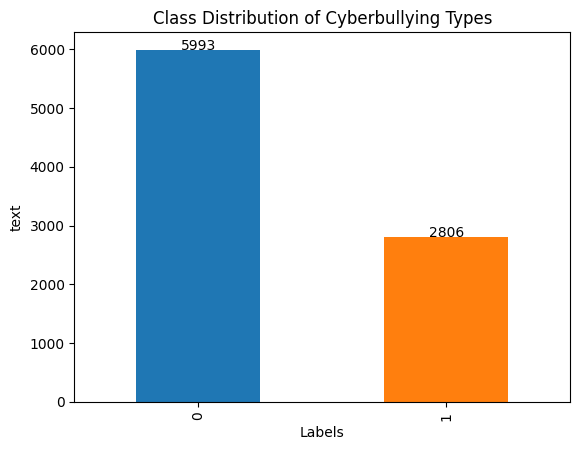

In [34]:
#bar graph
class_counts = df['oh_label'].value_counts()
ax = class_counts.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 3), textcoords='offset points')

plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('text')
plt.show()

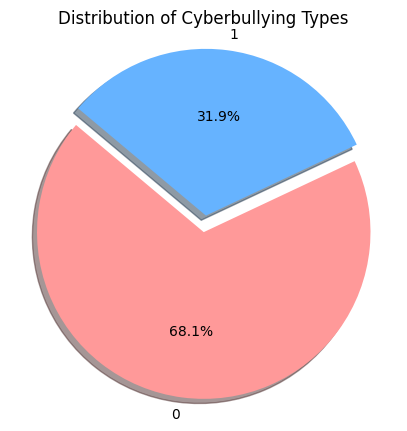

In [37]:
#pie chart
cyberbullying_counts = df['oh_label'].value_counts()
labels = cyberbullying_counts.index.tolist()
sizes = cyberbullying_counts.values.tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6']
explode = (0, 0.1)  # Explode the last slice for emphasis because other_cyberbullying has low percentage
plt.figure(figsize=(5, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Distribution of Cyberbullying Types')
plt.show()

In [38]:
df['oh_label'].replace(['not_cyberbullying'],
                        [0], inplace=True)
df['oh_label'].replace(['cyberbullying'],
                        [1], inplace=True)

<ipython-input-38-9dd5db0feaa8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oh_label'].replace(['not_cyberbullying'],
<ipython-input-38-9dd5db0feaa8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [39]:
df

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
...,...,...,...,...
8794,8794,0,20120612003508Z,"""Never really gave it much thought. I just fig..."
8795,8795,0,20120619210456Z,"""Nadie se salva de la regla 34 xd"""
8796,8796,0,20120528234613Z,"""Question: Are you a boy or a girl?"""
8797,8797,1,20120619153537Z,"""Leave your email or phone number and maybe yo..."


In [41]:
## Stop word removal

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [43]:
!pip install nltk

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  words = text.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return " ".join(filtered_words)
filtered_text = remove_stopwords(text)
print(filtered_text)

example sentence stop words.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# stemming
from nltk.stem import PorterStemmer # import the PorterStemmer object
porter_stemmer = PorterStemmer()


# punctuation removal
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [48]:
# Install necessary libraries
!pip install nltk

# Import necessary libraries
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK tokenizer resources
nltk.download('punkt')

# Tokenize the text
tokens = word_tokenize(text)

# Display the tokens
print("Tokens:", tokens)


Tokens: ['This', 'is', 'an', 'example', 'sentence', 'with', 'stop', 'words', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
df

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
...,...,...,...,...
8794,8794,0,20120612003508Z,"""Never really gave it much thought. I just fig..."
8795,8795,0,20120619210456Z,"""Nadie se salva de la regla 34 xd"""
8796,8796,0,20120528234613Z,"""Question: Are you a boy or a girl?"""
8797,8797,1,20120619153537Z,"""Leave your email or phone number and maybe yo..."


In [51]:


# Removing digits using str.replace method
for digit in '0123456789':
    text = text.replace(digit, '')

# Display the cleaned text
print("Cleaned Text:", text)
df.sample(5)


Cleaned Text: This is an example sentence with stop words.


,index,oh_label,Date,Text
1751,1751,0,20120502230035Z,"""F*&K YOU MTV."""
2909,2909,1,20120502202704Z,"""I'm a butch woman: won't you come try and who..."
1670,1670,1,20120610201216Z,"""Are you really this STUPID?"""
6895,6895,1,20120530052236Z,"""There's ""team SEC"" again. You're a Kentucky ..."
5730,5730,0,20120527211120Z,"""You is have bad grammar"""


In [52]:
import re
# Regular expression pattern to match emojis
emoji_pattern = re.compile(
    "["                   # Start of character set
    "\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Misc Symbols and Pictographs
    "\U0001F680-\U0001F6FF"  # Transport and Map Symbols
    "\U0001F700-\U0001F77F"  # Alchemical Symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U00002700-\U000027BF"  # Dingbats
    "\U000024C2-\U0001F251"  # Enclosed Characters
    "]+", flags=re.UNICODE)   # End of character set

# Remove emojis from the text
cleaned_text = emoji_pattern.sub(r'', text)

# Display the cleaned text
print("Cleaned Text:", cleaned_text)


Cleaned Text: This is an example sentence with stop words.


In [54]:
df.sample(3)

,index,oh_label,Date,Text
7781,7781,0,20120612052950Z,"""If you really think that cutting out a one he..."
2886,2886,0,20120610065939Z,"""Sanyu I suggest you get over cute and become ..."
2762,2762,0,20120619023504Z,"""Fuck this...something will be on youtube late..."


In [55]:
## bag of words
!pip install pandas scikit-learn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Sample text data
data = {
    'text': [
        "You fuck your dad.",
	      "i really don't understand your point",
        "majority of Canadians can and has",
	      "listen if you dont wanna get married to a man",
    ]
}
df = pd.DataFrame(data)

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data into a Bag of Words model
X_bow = vectorizer.fit_transform(df['text'])

# Convert the result to a DataFrame for better visualization
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

# Display the Bag of Words representation
print("Bag of Words Representation:")
print(bow_df)


Bag of Words Representation:
   and  can  canadians  dad  don  dont  fuck  get  has  if  ...  man  married  \
0    0    0          0    1    0     0     1    0    0   0  ...    0        0   
1    0    0          0    0    1     0     0    0    0   0  ...    0        0   
2    1    1          1    0    0     0     0    0    1   0  ...    0        0   
3    0    0          0    0    0     1     0    1    0   1  ...    1        1   

   of  point  really  to  understand  wanna  you  your  
0   0      0       0   0           0      0    1     1  
1   0      1       1   0           1      0    0     1  
2   1      0       0   0           0      0    0     0  
3   0      0       0   1           0      1    1     0  

[4 rows x 22 columns]


In [56]:
# Install necessary libraries
!pip install pandas scikit-learn

# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample text data
data = {
    'text': [
        "You fuck your dad.",
	      "i really don't understand your point",
        "majority of Canadians can and has",
	      "listen if you dont wanna get married to a man",

    ]
}
df = pd.DataFrame(data)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data into TF-IDF representation
X_tfidf = tfidf_vectorizer.fit_transform(df['text'])

# Convert the result to a DataFrame for better visualization
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF representation
print("TF-IDF Representation:")
print(tfidf_df)


TF-IDF Representation:
        and       can  canadians       dad       don     dont      fuck  \
0  0.000000  0.000000   0.000000  0.555283  0.000000  0.00000  0.555283   
1  0.000000  0.000000   0.000000  0.000000  0.465162  0.00000  0.000000   
2  0.408248  0.408248   0.408248  0.000000  0.000000  0.00000  0.000000   
3  0.000000  0.000000   0.000000  0.000000  0.000000  0.34057  0.000000   

       get       has       if  ...      man  married        of     point  \
0  0.00000  0.000000  0.00000  ...  0.00000  0.00000  0.000000  0.000000   
1  0.00000  0.000000  0.00000  ...  0.00000  0.00000  0.000000  0.465162   
2  0.00000  0.408248  0.00000  ...  0.00000  0.00000  0.408248  0.000000   
3  0.34057  0.000000  0.34057  ...  0.34057  0.34057  0.000000  0.000000   

     really       to  understand    wanna       you      your  
0  0.000000  0.00000    0.000000  0.00000  0.437791  0.437791  
1  0.465162  0.00000    0.465162  0.00000  0.000000  0.366739  
2  0.000000  0.00000    0.00

In [58]:
## using TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer

tfIdfVectorizer = TfidfVectorizer(use_idf = True, sublinear_tf = True)
tfIdf = tfIdfVectorizer.fit_transform(df.text.tolist())

print(tfIdf)
print(tfIdf.shape)

  (0, 20)	0.43779123108611473
  (0, 6)	0.5552826649411127
  (0, 21)	0.43779123108611473
  (0, 3)	0.5552826649411127
  (1, 21)	0.3667390112974172
  (1, 16)	0.4651619335222394
  (1, 4)	0.4651619335222394
  (1, 18)	0.4651619335222394
  (1, 15)	0.4651619335222394
  (2, 11)	0.408248290463863
  (2, 14)	0.408248290463863
  (2, 2)	0.408248290463863
  (2, 1)	0.408248290463863
  (2, 0)	0.408248290463863
  (2, 8)	0.408248290463863
  (3, 20)	0.2685092134645423
  (3, 10)	0.34056989045654285
  (3, 9)	0.34056989045654285
  (3, 5)	0.34056989045654285
  (3, 19)	0.34056989045654285
  (3, 7)	0.34056989045654285
  (3, 13)	0.34056989045654285
  (3, 17)	0.34056989045654285
  (3, 12)	0.34056989045654285
(4, 22)


In [62]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Sample dataset
data = {
    'text': [
     "You fuck your dad.",
          "i really don't understand your point",
        "majority of Canadians can and has",
          "listen if you dont wanna get married to a man",
        "Nadie se salva de la regla 34 xd",
        "Question: Are you a boy or a girl?",
    ],
    'label': [1, 0, 1, 1, 0, 1]  # 1 for cyberbullying related, 0 for non-cyberbullying
}
df = pd.DataFrame(data)

# Separate features and target variable
X = df['text']
y = df['label']

# Split the dataset into training and testing sets
# Removed stratify to avoid the error with the small dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_vec = vectorizer.transform(X_test)

# Train a simple model
model = DecisionTreeClassifier()
model.fit(X_train_vec, y_train) # Use the vectorized data

# Make predictions on the test set
y_pred = model.predict(X_test_vec) # Use the vectorized data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

Accuracy: 50.00%
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
#random oversampling on traning data
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy = 'not majority')

# Convert X_train to a DataFrame with a single column
X_train_df = pd.DataFrame(X_train)

X_over, y_over = oversample.fit_resample(X_train_df, y_train)

In [70]:

def getStatsFromModel(model):
    print(classification_report(y_test, y_pred))

    from sklearn.metrics import precision_score, recall_score, f1_score


    # Precision
    precision = precision_score(y_test, y_pred, average='weighted') * 100
    print(f"Precision: {precision:.2f}%")

    # Recall
    recall = recall_score(y_test, y_pred, average='weighted') * 100
    print(f"Recall: {recall:.2f}%")

    # F1-Score
    f1 = f1_score(y_test, y_pred, average='weighted') * 100
    print(f"F1-Score: {f1:.2f}%")

    y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.figure(figsize=(4,4))
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

    # Plot ROC curve
    logit_roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 0.1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [73]:
## evaluation of metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you  true labels (y_true) and predicted labels (y_pred)

# Accuracy
accuracy = accuracy_score(labels, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(labels, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(labels, y_pred)
print(f"Recall: {recall:.4f}")

# F1-score
f1 = f1_score(labels, y_pred)
print(f"F1-score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(labels, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.5000
Precision: 0.5000
Recall: 1.0000
F1-score: 0.6667
Confusion Matrix:
[[0 1]
 [0 1]]


In [80]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=28) # Changed n_components to be less than or equal to the number of features

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit and transform X_over
X_over_vec = vectorizer.fit_transform(X_over['text'])

# Transform X_test
X_test_vec = vectorizer.transform(X_test)

X_over_reduced = svd.fit_transform(X_over_vec)
X_test_reduced = svd.transform(X_test_vec)

Accuracy:  0.6666666666666666
Accuracy Percentage: 66.67%
Confusion Matrix: 
 [[0 1]
 [0 2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Precision: 44.44%
Recall: 66.67%
F1-Score: 53.33%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

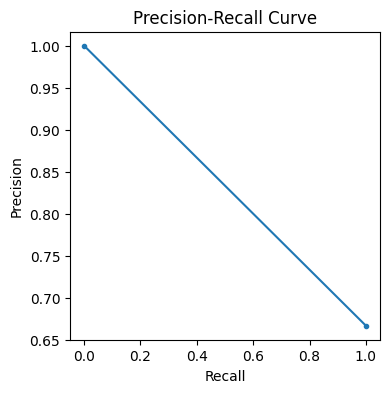

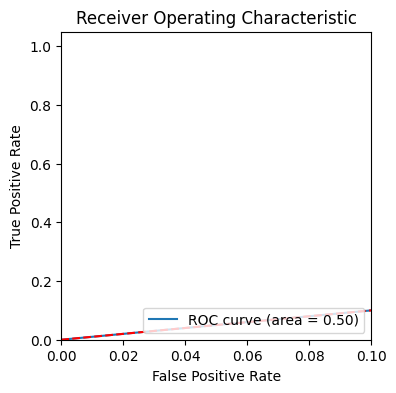

In [81]:
# Gaussian Naive Bayes

gnb = GaussianNB()
gnbmodel = gnb.fit(X_over_reduced, y_over)

# Make predictions
y_pred = gnbmodel.predict(X_test_reduced)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
getStatsFromModel(gnb)

In [83]:
##linear regression
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generate a sample dataset
np.random.seed(42)  # For reproducibility
X = 2 * np.random.rand(100, 1)  # Feature (independent variable)
y = 4 + 3 * X + np.random.randn(100, 1)  # Target (dependent variable) with some noise

# Convert to DataFrame for better handling
data = pd.DataFrame(np.hstack((X, y)), columns=['Feature', 'Target'])

# Separate features and target variable
X = data[['Feature']]
y = data['Target']

# Split the dataset into training and testing sets
X_train, X_test


(3                   Awareness and education are key.
 4              Hate speech can affect mental health.
 7               Cyberbullying can lead to isolation.
 0                  Cyberbullying is a serious issue.
 1                   It can have severe consequences.
 6    Ignoring cyberbullying won't solve the problem.
 Name: text, dtype: object,
 5             Support for victims is crucial.
 2      Preventing cyberbullying is important.
 8    Kindness and empathy can help reduce it.
 Name: text, dtype: object)

In [84]:
## logistic Regression
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generate a sample dataset
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary target based on feature sum

# Convert to DataFrame for better handling
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Target'] = y

# Separate features and target variable
X = data[['Feature1', 'Feature2']]
y = data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 85.00%
Confusion Matrix:
 [[10  0]
 [ 3  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



Accuracy: 96.00%
Confusion Matrix:
 [[101   5]
 [  3  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       106
           1       0.95      0.97      0.96        94

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



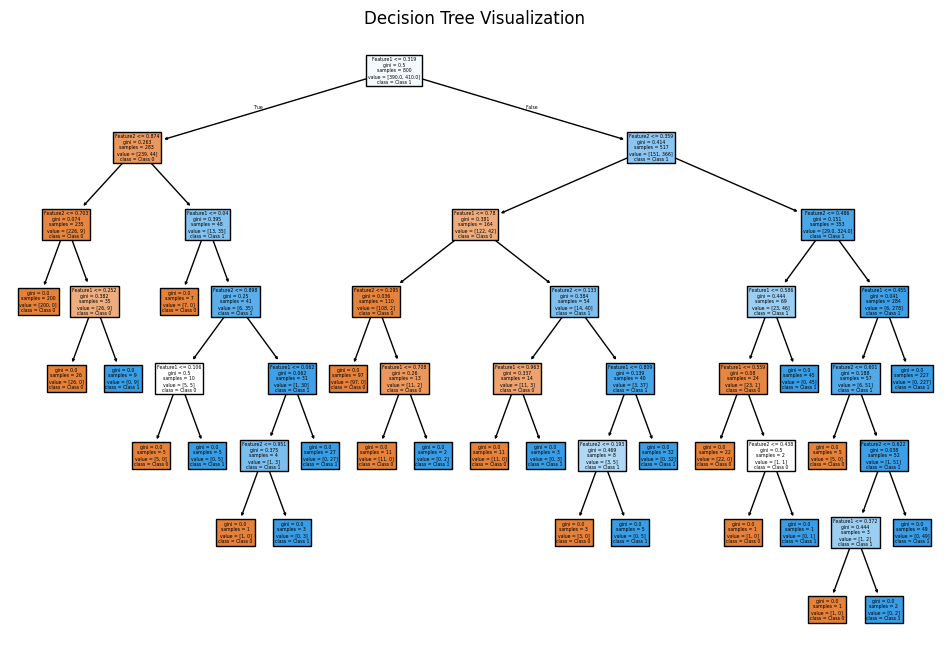

In [90]:
## decision tree classifier
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Generate a sample dataset
np.random.seed(42)  # For reproducibility
X = np.random.rand(1000, 2)  # 1000 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary target based on feature sum

# Convert to DataFrame for better handling
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Target'] = y

# Separate features and target variable
X = data[['Feature1', 'Feature2']]
y = data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=['Feature1', 'Feature2'], class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree Visualization')
plt.show()


In [93]:
#random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy Percentage: 97.50%
Accuracy: 0.975
Confusion Matrix:
 [[104   2]
 [  3  91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       106
           1       0.98      0.97      0.97        94

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



In [96]:
#Support vector classifier(SVC)
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print("Accuracy:", accuracy)

print(f"Accuracy Percentage: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.995
Accuracy Percentage: 99.50%
Confusion Matrix:
 [[105   1]
 [  0  94]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       106
           1       0.99      1.00      0.99        94

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [97]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
c= [
     "Never really gave it much thought. I just fig...",
    "Nadie se salva de la regla 34 xd",
    "Question: Are you a boy or a girl?",
    "Leave your email or phone number and maybe",
	  "From the scenarios you present, I see you bel",
  ]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()
vectorizer.fit(c)
tfidf_matrix = vectorizer.transform(c)

# Print the TF-IDF matrix
print(tfidf_matrix)

  (0, 7)	0.35355339059327373
  (0, 9)	0.35355339059327373
  (0, 11)	0.35355339059327373
  (0, 12)	0.35355339059327373
  (0, 16)	0.35355339059327373
  (0, 18)	0.35355339059327373
  (0, 24)	0.35355339059327373
  (0, 31)	0.35355339059327373
  (1, 0)	0.35355339059327373
  (1, 5)	0.35355339059327373
  (1, 13)	0.35355339059327373
  (1, 17)	0.35355339059327373
  (1, 25)	0.35355339059327373
  (1, 26)	0.35355339059327373
  (1, 28)	0.35355339059327373
  (1, 32)	0.35355339059327373
  (2, 2)	0.43429718303084847
  (2, 4)	0.43429718303084847
  (2, 10)	0.43429718303084847
  (2, 20)	0.3503882327118585
  (2, 23)	0.43429718303084847
  (2, 33)	0.3503882327118585
  (3, 1)	0.36152911730069653
  (3, 6)	0.36152911730069653
  (3, 14)	0.36152911730069653
  (3, 15)	0.36152911730069653
  (3, 19)	0.36152911730069653
  (3, 20)	0.2916794154657719
  (3, 21)	0.36152911730069653
  (3, 34)	0.36152911730069653
  (4, 3)	0.34092454627167806
  (4, 8)	0.34092454627167806
  (4, 22)	0.34092454627167806
  (4, 27)	0.34092454627

In [100]:
##  K-Nearest Neighbors (KNN)
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Generate a sample dataset
np.random.seed(42)  # For reproducibility
X = np.random.rand(1000, 2)  # 1000 samples, 2 features
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Binary target based on feature sum

# Convert to DataFrame for better handling
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Target'] = y

# Separate features and target variable
X = data[['Feature1', 'Feature2']]
y = data['Target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors Classifier
model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)




Accuracy: 97.00%
Accuracy:  0.97
Confusion Matrix:
 [[102   4]
 [  2  92]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       106
           1       0.96      0.98      0.97        94

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [ ]:
# percentage of Non Cyberbullying (0) :  68.11001250142061 %
# percentage of Cyberbullying (1) :  31.889987498579387 %
# Accuracy percentage of KNN 97.00%
# Accuracy percentage of Support vector classifier(SVC) 99.50%
# Accuracy percentage of Random forest 97.50%
# Accuracy percentage of Decision tree classifier 96.0%
# Accuracy percentage of logistic Regression 85.0%
# Accuracy percentage of guasian naive bayes 66.67%
# Accuracy percentage of bag of words 50.6%